<a href="https://colab.research.google.com/github/being-harisz/SDC/blob/main/TEXT_TO_IMAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ✅ STEP 1: Setup Environment (Clone WebUI and Download Model)
!git clone https://github.com/AUTOMATIC1111/stable-diffusion-webui /content/stable-diffusion-webui
%cd /content/stable-diffusion-webui

# Download Stable Diffusion 1.5 model checkpoint (no Hugging Face login required)
!mkdir -p /content/stable-diffusion-webui/models/Stable-diffusion
!wget -O /content/stable-diffusion-webui/models/Stable-diffusion/model.ckpt https://huggingface.co/runwayml/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.ckpt

# Download the YAML config for the model
!wget -O /content/stable-diffusion-webui/models/Stable-diffusion/v1-inference.yaml https://raw.githubusercontent.com/CompVis/stable-diffusion/main/configs/stable-diffusion/v1-inference.yaml

# ✅ STEP 2: Install Required Dependencies
!pip install -q transformers==4.25.1 diffusers invisible-watermark omegaconf einops torch torchvision

# ✅ STEP 3: Load and Run Stable Diffusion Locally Without API
from PIL import Image
import torch
from torchvision import transforms
from einops import rearrange
from omegaconf import OmegaConf
import numpy as np
import matplotlib.pyplot as plt
import os

# Load model config and checkpoint
config_path = "/content/stable-diffusion-webui/models/Stable-diffusion/v1-inference.yaml"
ckpt_path = "/content/stable-diffusion-webui/models/Stable-diffusion/model.ckpt"

config = OmegaConf.load(config_path)
from ldm.util import instantiate_from_config

model = instantiate_from_config(config.model)
state_dict = torch.load(ckpt_path, map_location="cpu")["state_dict"]
model.load_state_dict(state_dict)
model = model.to("cuda")
model.eval()

# Sampling function using DDIM
def generate(prompt, steps=50, guidance_scale=7.5, height=512, width=512):
    from ldm.models.diffusion.ddim import DDIMSampler
    sampler = DDIMSampler(model)
    uc = model.get_learned_conditioning([""])
    c = model.get_learned_conditioning([prompt])
    shape = [4, height // 8, width // 8]
    samples, _ = sampler.sample(S=steps, conditioning=c, batch_size=1, shape=shape, verbose=False,
                                unconditional_guidance_scale=guidance_scale,
                                unconditional_conditioning=uc, eta=0.0)
    x_samples = model.decode_first_stage(samples)
    x_samples = torch.clamp((x_samples + 1.0) / 2.0, 0.0, 1.0)
    img = 255. * rearrange(x_samples[0].cpu().numpy(), 'c h w -> h w c')
    img = Image.fromarray(img.astype(np.uint8))
    return img

# ✅ STEP 4: Generate Image from Text
prompt = "A surreal dreamscape of floating islands in a colorful sky"
image = generate(prompt)

# Save and show image
output_path = "/content/generated_image.png"
image.save(output_path)
image.show()

# Optional: Download image to local system
from google.colab import files
files.download(output_path)


fatal: destination path '/content/stable-diffusion-webui' already exists and is not an empty directory.
/content/stable-diffusion-webui
--2025-04-23 05:03:19--  https://huggingface.co/runwayml/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.ckpt
Resolving huggingface.co (huggingface.co)... 3.167.112.25, 3.167.112.38, 3.167.112.45, ...
Connecting to huggingface.co (huggingface.co)|3.167.112.25|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: /stable-diffusion-v1-5/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.ckpt [following]
--2025-04-23 05:03:19--  https://huggingface.co/stable-diffusion-v1-5/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.ckpt
Reusing existing connection to huggingface.co:443.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/66/6f/666f465fa70158515404e8de2c6bc6fe2f90c46f9296293aa14daededeb32c52/cc6cb27103417325ff94f52b7a5d2dde45a7515b25c255d8e396c90014281516?respo

AttributeError: module 'sympy' has no attribute 'core'

In [3]:
# Step 1: Install Required Libraries
!pip install diffusers transformers torch

# Step 2: Import Libraries
from diffusers import StableDiffusionPipeline
import torch

# Step 3: Load Pre-trained Stable Diffusion Model
# You need a Hugging Face account to access some models; you can use your token for authentication.
# You can get the token from https://huggingface.co/settings/tokens
# Uncomment the line below and replace 'your_huggingface_token' with your actual token.

# from huggingface_hub import login
# login(token='your_huggingface_token')

# Load the Stable Diffusion pipeline from Hugging Face
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v-1-4-original",
                                               torch_dtype=torch.float16)
pipe.to("cuda")

# Step 4: Generate an Image from Text
prompt = "A futuristic city skyline at sunset, with flying cars and neon lights"
image = pipe(prompt).images[0]

# Step 5: Display the Image
image.show()

# Optional: Save the image
image.save('/content/generated_image.png')

# Optional: Download the generated image
from google.colab import files
files.download('/content/generated_image.png')


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


0it [00:00, ?it/s]

RuntimeError: Failed to import diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion because of the following error (look up to see its traceback):
Failed to import transformers.models.clip.modeling_clip because of the following error (look up to see its traceback):
module 'sympy' has no attribute 'core'

Using device: CUDA


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

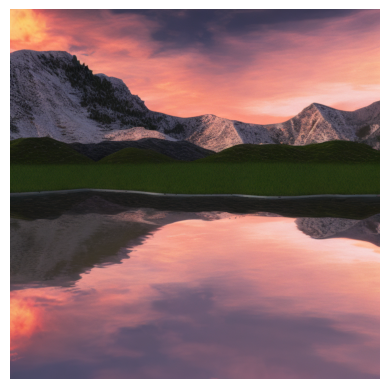

In [1]:
# ========================================
# ✅ Install dependencies
# ========================================
!pip install -q diffusers transformers accelerate safetensors

# ========================================
# ✅ Import required libraries
# ========================================
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
import matplotlib.pyplot as plt

# ========================================
# ✅ Check if CUDA (GPU) is available
# ========================================
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device.upper()}")

# ========================================
# ✅ Load Stable Diffusion model (using float16 precision)
# ========================================
model_id = "stabilityai/stable-diffusion-2-1"  # You can replace this with another model
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

# Move model to the correct device (T4 GPU in this case)
pipe.to(device)

# ========================================
# ✅ Text prompt for image generation
# ========================================
prompt = "a beautiful sunset over a mountain range, highly detailed, realistic"

# ========================================
# ✅ Generate image from text prompt
# ========================================
with torch.no_grad():
    image = pipe(prompt).images[0]

# ========================================
# ✅ Display the generated image
# ========================================
plt.imshow(image)
plt.axis("off")  # Turn off axis labels
plt.show()